### Plan du Projet DATA :

_____________________________________________________________

1. Traitement de données : compréhension des données, analyse de la 
complétude et de la conformité des données, contrôles de cohérence
(univarié/multivarié), gestion des anomalies : mise en place de correctif, 
exclusions, etc.
2. Jointures éventuelles de bases et contrôles 
3. Analyses descriptives des données : univariée, multivariée, ASD
4. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
5. Modélisation : supervisée (régression, classification) vs non supervisée ; 
paramétrique (économétriques) vs non paramétriques (machine learning)
6. Analyse des résultats : interprétation, explications 
7. Application : prévision, tarification, etc.



- Understanding the Problem Statement
- 2. Import Data and Required Packages
    2.1 Import Packages
    2.2 Import Data
    2.3 Show top 5
- 3. Data Preprocessing 
    - 3.1 DB_SIN
        * 3.1.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)
        * 3.1.b Preprocessing and Exploratory Analysis
        * 3.1.c Visualization
    - 3.2 DB_CNT
        * 3.2.a Data Check and cleaning (Missing Values, Duplicates, Data Types, Unique values)
        * 3.2.b Preprocessing and Exploratory Analysis
        * 3.2.c Visualization
    - 3.3 DB_TELEMATICS
        * 3.3.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values)
        * 3.3.b Preprocessing and Exploratory Analysis
        * 3.3.c Visualization
- 4. DataBase Merges : 
    * 4.1. Descriptive Data Analysis : Univaried/Multivaried
    * 4.2. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
- 5. Modélisation
    * 5.1 supervisée (régression, classification) vs non supervisée ; 
    * 5.2 paramétrique (économétriques) vs non paramétriques (machine learning)
- 7. Analyse des résultats : interprétation, explications 
- 8. Application : prévision, tarification, etc.

## 1) Statement
##### 1.1 Problem statement
- Our project revolves around harnessing the potential of recently acquired insurance databases. The objective is to extract meaningful insights and actionable information to enhance our understanding of the insurance landscape.
- Given the constraints and in line with industry standards, we have chosen Python as our primary tool for data analysis. Python's versatility and extensive libraries, such as Pandas, NumPy, and Scikit-learn, will be crucial in efficiently handling, processing, and analyzing the vast amounts of insurance data at our disposal.


##### 1.2 Import Data and Required Packages
- Dataset Source :
    * DB_SIN.txt
    * DB_CNT.xlsx
    * DB_TELEMATICS.csv
    

## 2. Import Packages
  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Import Data

In [ ]:
# Read DB_SIN.txt
sin_df = pd.read_csv('Data/DB_SIN.txt', delimiter='\t')  # Assuming it's a tab-separated file

# Read DB_CNT.xlsx from the sheet named 'DB_CNT'
cnt_df = pd.read_excel('Data/DB_CNT.xlsx', sheet_name='DB_CNT')

# Read DB_Telematics.csv
telematics_df = pd.read_csv('Data/DB_Telematics.csv', delimiter=';')


#### 2.3 Show top 5

In [ ]:
sin_df.head()

We immediately see the disparity on the comma placement in AMT_Claim.

In [ ]:
cnt_df.head()

We notice some matter in Insured.sex inputs, we will investigate it further.

In [ ]:
telematics_df.head()

## 3. Data Preprocessing 

### 3.1 : DB_Sin

- 3.1.a : Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)

In [ ]:
sin_df.shape

In [ ]:
sin_df.isna().sum()

In [ ]:
print("DB_SIN.txt DataFrame:")
print(sin_df.info())

In [ ]:
# Check for duplicates in 'Id_pol' and print information for sin_df
duplicates_info_sin = sin_df['Id_pol'].value_counts()
duplicates_info_sin = duplicates_info_sin[duplicates_info_sin > 1]  # Filter only values with more than one occurrence

total_duplicates_sin = duplicates_info_sin.sum()

In [ ]:
print("\nDuplicated 'Id_pol' values and their counts in sin_df DataFrame:")
print(duplicates_info_sin)
print(f"\nTotal count of duplicates in sin_df: {total_duplicates_sin}")

In [ ]:
# Check for duplicates in 'Id_pol' in sin_df
duplicates_info_sin = sin_df[sin_df.duplicated(subset=['Id_pol'], keep=False)]

# Filter duplicates where 'AMT_Claim' is equal to 0 and drop those rows
sin_df = sin_df.drop(sin_df[(sin_df['Id_pol'].isin(duplicates_info_sin['Id_pol'])) & (sin_df['AMT_Claim'] == 0)].index)

# Confirm the changes
print("sin_df after removing duplicates with 'AMT_Claim' == 0:")
print(sin_df)
numeric_summary = sin_df['NB_Claim'].describe()
numeric_summary
unique_values = sin_df['NB_Claim'].unique()

In [ ]:
# Display the unique values
print("Unique values in 'NB_Claim':")
print(unique_values)

In [ ]:
# Replace specific values in 'NB_Claim'
sin_df['NB_Claim'] = sin_df['NB_Claim'].replace({'NB_CLAIM:1': '1', 'NB_CLAIM:2': '2'})

unique_values = sin_df['NB_Claim'].unique()
print("Unique values in 'NB_Claim':")
print(unique_values)


In [ ]:
# Display descriptive statistics for numeric columns
numeric_summary = sin_df.describe()

# Display summary for object columns
object_summary = sin_df.describe(include='object')

In [ ]:
# Display the results
print("Numeric Summary:")
print(numeric_summary)

In [ ]:
print("\nObject Summary:")
print(object_summary)


We will have to turn NB_Claim and AMT_Claim to integers.

In [ ]:
# Display unique values and their counts in 'AMT_Claim'
unique_values_counts = sin_df['AMT_Claim'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'AMT_Claim':")
print(unique_values_counts)

Lets fix the ANN situation, we will turn ANN (NaN's) into 0. and convert them to integers since these values are "amounts".  
Secondly, we will take off the decimal part since it'll be easier for operations.  AMT_Claim is the Agregated Amount of CLAIM (probably in dollars $, € or £)

In [ ]:
# Convert 'AMT_Claim' to numeric (replace 'ANN' with 0)
sin_df['AMT_Claim'] = sin_df['AMT_Claim'].replace({'ANN': '0'})

# Extract the part before the comma and convert to numeric
sin_df['AMT_Claim'] = sin_df['AMT_Claim'].astype(str).str.split(',').str[0]
sin_df['AMT_Claim'] = pd.to_numeric(sin_df['AMT_Claim'], errors='coerce')
# Display unique values and their counts in 'AMT_Claim'
unique_values_counts = sin_df['AMT_Claim'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'AMT_Claim':")
print(unique_values_counts)


In [ ]:
# Convert 'NB_Claim' to numeric (replace ',' with '.' if needed)
sin_df['NB_Claim'] = pd.to_numeric(sin_df['NB_Claim'].str.replace(',', '.'), errors='coerce')
print("DB_SIN.txt DataFrame:")
print(sin_df.info())

#### Conclusion for Sin_DF data prepocessing : 

For the SIN_DF data we did the following things to clean up the data :
1. NB_Claim : We managed to have 3 differents inputs ('1','2','3') and put them as integers
2. AMT_Claim : we managed to put the values as integers and 
3. Turned all ANN (NaN's) to 0
4. We corrected the 'comma'/'point' situation for the numeric values

#### 3.1.b Preprocessing and Exploratory Analysis

In [ ]:
sin_df.describe()

- The mean amount of AMT_Claim is 3136.  
- The max amount is 104074.  
- Most of the people (75%) gets above 3702.  
- 474 (around 10%) did get 0.  

We can look to see which category of 'NB_Claim' get the most of money (A boxplot with outliers would give the hint).

#### 3.1.c Visualization

In [ ]:
sns.boxplot(x='NB_Claim', y='AMT_Claim', data=sin_df, hue='NB_Claim')
plt.title('Boxplot of AMT_Claim by NB_Claim')
plt.show()
 

Visualizing the Boxplot of AMT_Claim by NB_Claim we notice the outliers on each category of NB_Claim.  
While the mean is around 3136 FOR AMT_Claim we observe values going from 10.000 to 104.000 for NB_Claim == 1. 

### 3.2 : DB_CNT
   - 3.2.a : Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)

In [ ]:
print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())

#### The DataSet is shaped as (100399, 12). 100399 rows and 12 columns.  
- Duration : Duration of the insurance coverage of a given policy, in days  
- Insured.age : Age of insured driver, in years  
- Insured.sex : Sex of insured driver (Male/Female)  
- Car.age : Age of vehicle, in years  
- Marital : Marital status (Single/Married)  
- Car.use : Use of vehicle: Private, Commute, Farmer, Commercial  
- Credit.score : Credit score of insured driver  
- Region  : Type of region where driver lives: rural, urban  
- Annual.miles.drive : Annual miles expected to be driven declared by driver  
- Years.noclaims : Number of years without any claims  
- Territory : Territorial location of vehicle  
Conditions to meet :   
• Duration is the period that policyholder is insured in days, with values in [22,366].  
• Insured.age is the age of insured driver in integral years, with values in [16,103].  
• Car.age is the age of vehicle, with values in [-2,20]. Negative values are rare but are possible as buying a newer model can be up to two years in advance.  
• Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.  
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}. 

In [ ]:
# Check for duplicates in 'Id_pol' and print information for cnt_df
duplicates_info_cnt = cnt_df['Id_pol'].value_counts()
duplicates_info_cnt = duplicates_info_cnt[duplicates_info_cnt > 1]  # Filter only values with more than one occurrence

total_duplicates_cnt = duplicates_info_cnt.sum()

print("Duplicated 'Id_pol' values and their counts in cnt_df DataFrame:")
print(duplicates_info_cnt)
print(f"\nTotal count of duplicates in cnt_df: {total_duplicates_cnt}")

In [ ]:
# Check for duplicates in 'Id_pol'
duplicates_cnt = cnt_df[cnt_df.duplicated(subset=['Id_pol'], keep=False)]

# Print information about duplicates in cnt_df
print(f"Total count of duplicates in cnt_df: {len(duplicates_cnt)}")

In [ ]:
# Identify and print details of duplicates
duplicates_mask = cnt_df.duplicated(subset=['Id_pol'], keep=False)
duplicates_df = cnt_df[duplicates_mask]

print(f"Total count of duplicates: {len(duplicates_df)}")
print("Details of duplicates:")
print(duplicates_df)

In [ ]:
# Remove rows where 'Marital' is empty only for the duplicates
empty_marital_mask = duplicates_df['Marital'].isna() | (duplicates_df['Marital'] == '')
cnt_df = cnt_df[~(duplicates_mask & empty_marital_mask)]

# Check the result
print(f"Total count after removing duplicates with empty 'Marital': {len(cnt_df)}")
cnt_df.dropna(subset=['Marital'], inplace=True)
print(f"We Delete rows where 'Marital' is empty. We notice that most of them are duplicates")

print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())


In [ ]:
# Filter object variables
object_columns = cnt_df.select_dtypes(include='object').columns

# Display unique values for each object variable
for column in object_columns:
    unique_values = cnt_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

##### Imputation of missing Values, and Miss-written Inputs.
We will proceed as following :

- Insured.Sex : We will match inputs as Male, Female  
- Marital : Single, Married  
- Car use : Private, Commute, Farmer, Commercial. We will use Territory values to commute to the right car use value.  
- Region : Urban, Rural. With help of terrority we will find the right Region for missing values.  
- Year.noclaims : EAJ > 0, Then we will turn the column to integer. 

In [ ]:
# Count occurrences of unique values in 'Insured.sex'
sex_counts = cnt_df['Insured.sex'].value_counts()

# Display the result
print("Count of unique values in 'Insured.sex':")
print(sex_counts)
print()


In [ ]:
# Count occurrences of unique values in 'Region'
Region_counts = cnt_df['Region'].value_counts()

# Display the result
print("Count of unique values in 'Region':")
print(Region_counts)
print()


In [ ]:
# Count occurrences of unique values in 'Marital'
marital_counts = cnt_df['Marital'].value_counts()

# Display the result
print("Count of unique values in 'Marital':")
print(marital_counts)

In [ ]:
# Map values in 'Insured.sex'
sex_mapping = {'Male': ['Male', 'H', 'Unknown'], 'Female': ['Female', 'F']}

# Replace values in 'Insured.sex'
for category, values in sex_mapping.items():
    cnt_df['Insured.sex'] = cnt_df['Insured.sex'].replace(values, category)

# Verify the result
sex_counts_after_mapping = cnt_df['Insured.sex'].value_counts()
print("Count of unique values in 'Insured.sex' after mapping:")
print(sex_counts_after_mapping)
# Map values in 'Marital'
marital_mapping = {'Single': ['Single', 'Celib'], 'Married': ['Married', 'Marié']}

# Replace values in 'Marital'
for category, values in marital_mapping.items():
    cnt_df['Marital'] = cnt_df['Marital'].replace(values, category)

# Add 'Unknown' and NaN to 'Single'
cnt_df['Marital'] = cnt_df['Marital'].fillna('Single')
cnt_df['Marital'] = cnt_df['Marital'].replace('Unknown', 'Single')

# Verify the result
marital_counts_after_mapping = cnt_df['Marital'].value_counts()
print("Count of unique values in 'Marital' after mapping:")
print(marital_counts_after_mapping)

• Region  : Type of region where driver lives: rural, urban   
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  
To fix the Region values, we will make clusters of Regions.
The idea here is to see the tuples as following :
Tuple = [Value(Region) : Territory(1,2,...)].  
Exemple : [Rural, Territory (1,5,9), Urban, Territory (7,89,63,...)].  
With this idea, we will then input the approx Region. 

In [ ]:
# Select rows where 'Car.use' is in the specified categories
selected_car_use = ['Private', 'Commute', 'Farmer', 'Commercial']
filtered_df = cnt_df[cnt_df['Car.use'].isin(selected_car_use)]

# Group by 'Car.use' and count the occurrences of each 'Territory'
territory_by_car_use = filtered_df.groupby('Car.use')['Territory'].value_counts()

# Display the result
print(territory_by_car_use)
# Display unique values and their counts in 'Years.noclaims'
unique_values_counts = cnt_df['Years.noclaims'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'Years.noclaims':")
print(unique_values_counts)

In [ ]:
# Define the allowed car use categories
allowed_car_use = ['Private', 'Commute', 'Farmer', 'Commercial']

# Filter rows where 'Car.use' is not in the allowed categories
invalid_car_use_mask = ~cnt_df['Car.use'].isin(allowed_car_use)

# For invalid 'Car.use', correct based on 'Territory'
for index, row in cnt_df[invalid_car_use_mask].iterrows():
    territory = row['Territory']
    
    # Define mapping from Territory to corrected Car.use
    territory_to_car_use = {
        # Define your mappings here
        1: 'Private',
        2: 'Commute',
        3: 'Farmer',
        4: 'Commercial',
        # Add more mappings as needed
    }

    # Correct the 'Car.use' based on 'Territory'
    corrected_car_use = territory_to_car_use.get(territory, 'Commute')

    # Update the 'Car.use' in the DataFrame
    cnt_df.at[index, 'Car.use'] = corrected_car_use


In [ ]:
# Verify the changes
print(cnt_df['Car.use'].value_counts())
# Define the allowed Region categories
allowed_Region = ['Rural', 'Urban']

# Filter rows where 'Region' is not in the allowed categories
invalid_Region_mask = ~cnt_df['Region'].isin(allowed_Region)

# For invalid 'Region', correct based on 'Territory'
for index, row in cnt_df[invalid_Region_mask].iterrows():
    territory = row['Territory']
    
    # Define mapping from Territory to corrected Region
    territory_to_Region = {
        # Define your mappings here
        1: 'Urban',
        2: 'Rural',
    }

    # Correct the 'Region' based on 'Territory'
    corrected_Region = territory_to_Region.get(territory, 'Urban')

    # Update the 'Region' in the DataFrame
    cnt_df.at[index, 'Region'] = corrected_Region

In [ ]:
# Verify the changes
print(cnt_df['Region'].value_counts())
# Count occurrences of 'EAJ' in 'Years.noclaims'
eaj_count = cnt_df['Years.noclaims'].eq('EAJ').sum()

# Display the result
print("Number of occurrences of 'EAJ':", eaj_count)

Years.noclaims must be in [0,79].  
Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.
We will add 'EAJ' to 1 and all the occurances from greater than 79 years will be added back to 79.

In [ ]:
# Replace 'EAJ' with 1
cnt_df['Years.noclaims'] = cnt_df['Years.noclaims'].replace('EAJ', 1)

# Convert 'Years.noclaims' to numeric
cnt_df['Years.noclaims'] = pd.to_numeric(cnt_df['Years.noclaims'], errors='coerce')

# Replace values greater than 79 with 79
cnt_df['Years.noclaims'] = cnt_df['Years.noclaims'].where(cnt_df['Years.noclaims'] <= 79, 79)

# Verify the result
years_noclaims_summary = cnt_df['Years.noclaims'].describe()
print("Summary of 'Years.noclaims' after modifications:")
print(years_noclaims_summary)

Years.noclaims must always be less than insured.age

In [ ]:
# Check if 'Years.noclaims' is less than 'Insured.age'
invalid_years_noclaims_mask = cnt_df['Years.noclaims'] >= cnt_df['Insured.age']

# Calculate 'Years.noclaims - 16' for rows where the condition is not met
cnt_df.loc[~invalid_years_noclaims_mask, 'Years.noclaims'] = np.maximum(0, cnt_df['Years.noclaims'] - 16)

# Set values under 22 in 'Duration' to 22
cnt_df.loc[cnt_df['Duration'] < 22, 'Duration'] = 22

# Filter object variables
object_columns = cnt_df.select_dtypes(include='object').columns

# Display unique values for each object variable
for column in object_columns:
    unique_values = cnt_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Conditions Check :   
• Duration is the period that policyholder is insured in days, with values in [22,366].  
• Insured.age is the age of insured driver in integral years, with values in [16,103].  
• Car.age is the age of vehicle, with values in [-2,20]. Negative values are rare but are possible as buying a newer model can be up to two years in advance.  
• Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.  
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  

In [ ]:
# Find the range of values in 'Duration'
duration_range = (cnt_df['Duration'].min(), cnt_df['Duration'].max())
# Print the range
print("Range of values in 'Duration':", duration_range)


In [ ]:
# Find the range of values in 'Insured.Age'
Insured_age_range = (cnt_df['Insured.age'].min(), cnt_df['Insured.age'].max())
# Print the range
print("Range of values in 'Insured.age':", Insured_age_range)

In [ ]:
# Find the range of values in 'Car.age'
Car_age_range = (cnt_df['Car.age'].min(), cnt_df['Car.age'].max())
# Print the range
print("Range of values in 'Car.age':", Car_age_range)

In [ ]:
# Find the range of values in 'Years.noclaims'
Years_noclaims_range = (cnt_df['Years.noclaims'].min(), cnt_df['Years.noclaims'].max())
# Print the range
print("Range of values in 'Years.noclaims':", Years_noclaims_range)

In [ ]:
# Find the range of values in 'Territory'
Territory_range = (cnt_df['Territory'].min(), cnt_df['Territory'].max())
# Print the range
print("Range of values in 'Territory':", Territory_range)


For simplication purpose, we will turn 'Credit.score' and 'Annual.miles.drive' to integers

In [ ]:
# Convert 'Credit.score' and 'Annual.miles.drive' to integers
cnt_df['Credit.score'] = cnt_df['Credit.score'].astype('int64')
cnt_df['Annual.miles.drive'] = cnt_df['Annual.miles.drive'].astype('int64')
print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())

#### 3.2.c Visualization
- Age and sex
- Sex and Car use
- Car Age and Credit Score
- Car Age and Car use and Region
- Annual miles and Region
- Annual miles and Car Use

### 3.3 DB_TELEMATICS

In [ ]:
print("\nDB_Telematics.csv DataFrame:")
print(telematics_df.info())

DB_CNT has 100399 where DB_TELEMATICS has 100332 lines. 

* Annual.pct.driven Annualized percentage of time on the road  
* Total.miles.driven Total distance driven in miles  
* Pct.drive.xxx Percent of driving day xxx of the week: mon/tue/. . . /sun  
* Pct.drive.xhrs Percent vehicle driven within x hrs: 2hrs/3hrs/4hrs  
* Pct.drive.xxx Percent vehicle driven during xxx: wkday/wkend  
* Pct.drive.rushxx Percent of driving during xx rush hours: am/pm  
* Avgdays.week Mean number of days used per week  
* Accel.xxmiles Number of sudden acceleration 6/8/9/. . . /14 mph/s per 1000miles  
* Brake.xxmiles Number of sudden brakes 6/8/9/. . . /14 mph/s per 1000miles  
* Left.turn.intensityxx Number of left turn per 1000miles with intensity 08/09/10/11/12  
* Right.turn.intensityxx Number of right turn per 1000miles with intensity 08/09/10/11/12  
Conditions to meet for TELEMATICS.csv :  
• Annual.pct.driven is the number of day a policyholder uses vehicle divided by 365, with
values in [0,1.1].  
• Pct.drive.mon, · · · , Pct.drive.sun are compositional variables meaning that the sum
of seven (days of the week) variables is 100%.  
• Pct.drive.wkday and Pct.drive.wkend are clearly compositional variables too.

#### 3.3.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values)

We see that the variable Id_pol is in a different form and some of the columns are objects when they should be floats. Lets start there.

In [ ]:
# Remove 'cnt_' prefix from 'Id_pol'
telematics_df['Id_pol'] = telematics_df['Id_pol'].str.replace('cnt_', '')

# Convert 'Id_pol' to integers
telematics_df['Id_pol'] = telematics_df['Id_pol'].astype('int64')

# Display the updated 'Id_pol' column
print(telematics_df['Id_pol'])

In [ ]:
#Columns to convert to float
columns_to_convert = [
    'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue',
    'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
    'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend',
    'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week'
]

columns_to_integer = [
    'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles',	'Accel.12miles', 'Accel.14miles',	
    'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles',	'Brake.12miles', 'Brake.14miles',	
    'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11',	'Left.turn.intensity12',
    'Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.intensity11',	'Right.turn.intensity12'

]

In [ ]:
#We replace ',' to '.'
telematics_df[columns_to_convert] = telematics_df[columns_to_convert].replace(',', '.', regex=True)
# Convert 'Id_pol' to integers
telematics_df[columns_to_integer] = telematics_df[columns_to_integer].astype('int64')

telematics_df[columns_to_convert] = telematics_df[columns_to_convert].astype(float)
# Round float columns to two decimal places
telematics_df[columns_to_convert] = telematics_df[columns_to_convert].round(2)

In [ ]:
#Checking for missing values
missing_values = telematics_df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

There is no missing Values in the DataSet. 

In [ ]:
print("\nDB_Telematics.csv DataFrame:")
print(telematics_df.info())

In [ ]:
# Check for duplicates in 'Id_pol'
duplicates_db_telematics = telematics_df[telematics_df.duplicated(subset=['Id_pol'], keep=False)]['Id_pol'].unique()
print("Duplicates in DB_Telematics:")
print(duplicates_db_telematics)

In [ ]:
# Find and display duplicated 'Id_pol' values and their counts
duplicates_info = telematics_df['Id_pol'].value_counts()
duplicates_info = duplicates_info[duplicates_info > 1]  # Filter only values with more than one occurrence

total_duplicates = int(duplicates_info.sum()/2)

print("Duplicated 'Id_pol' values and their counts in DB_Telematics DataFrame:")
print(duplicates_info)
print(f"\nTotal count of duplicates: {total_duplicates}")

In [ ]:
# Get the duplicated values in 'Id_pol'
duplicates_db_telematics = telematics_df[telematics_df.duplicated(subset=['Id_pol'], keep=False)]['Id_pol'].unique()

# Remove rows with other variables equal to 0 for duplicated 'Id_pol'
filtered_db_telematics = telematics_df[~((telematics_df['Id_pol'].isin(duplicates_db_telematics)) & (telematics_df.iloc[:, 1:] == 0).any(axis=1))]

print("Filtered DB_Telematics DataFrame:")
print(filtered_db_telematics)

telematics_df= filtered_db_telematics

In [ ]:
# For telematics_df
#telematics_df.to_csv('Data/Artefacts/telematics_df3.csv', index=False)
# Download the files as csv to into artefact document folder :
# For sin_df
#sin_df.to_csv('Data/Artefacts/sin_df2.csv', index=False)

# For cnt_df
#cnt_df.to_csv('Data/Artefacts/cnt_df2.csv', index=False)

# For telematics_df
#filtered_db_telematics.to_csv('Data/Artefacts/telematics_df2.csv', index=False)
#### 3.3.b Preprocessing and Exploratory Analysis

#### 3.3.c Visualization

## 4. Merging DataBases

We will merge the bases to be able to work on a larger scale of variables.

In [ ]:
# Merge the datasets on 'Id_pol'
merged_df1 = pd.merge(telematics_df, cnt_df, on='Id_pol', how='inner')
missing_values = merged_df1.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

### Feature Engineering : 

To simplify the dataset and extract meaningful features, we can define the following types of variables through feature engineering:  

1. **Demographic Features**:  
   - **Age Group**: Categorize insured driver's age into groups (e.g., young adult, middle-aged, senior).
   - **Gender Binary**: Convert 'Insured.sex' into a binary variable (0 for male, 1 for female).  

2. **Policy and Vehicle Features**:  
   - **Policy Duration Category**: Group 'Duration' into categories (e.g., short-term, medium-term, long-term).
   - **Vehicle Age Group**: Categorize 'Car.age' into groups (e.g., new, moderately old, old).
   - **Credit Score Group**: Bin 'Credit.score' into categories (e.g., poor, fair, good, excellent).
   - **Car Use Category**: Create dummy variables for 'Car.use' (Private, Commute, Farmer, Commercial).
   - **Region Type**: Convert 'Region' into binary variable (0 for rural, 1 for urban).  

3. **Traditional Driving Behavior Features**:  
   - **Average Annual Miles Group**: Categorize 'Annual.miles.drive' into groups (e.g., low mileage, moderate mileage, high mileage).
   - **Years Without Claims Group**: Categorize 'Years.noclaims' into groups (e.g., no claims, 1-2 years, 3-5 years, more than 5 years).
   - **Territory Code**: Convert 'Territory' into binary variables (one-hot encoding) or drop the variable since we have the info in 'Region'.  

4. **Telematics Driving Behavior Features**:  
   - **Driving Intensity**: Sum of 'Left.turn.intensityxx' and 'Right.turn.intensityxx' for overall turning intensity.
   - **Weekly Driving Patterns**: Sum of 'Pct.drive.xxx' for overall weekly driving patterns.
   - **Hourly Driving Patterns**: We we will drop these variables since we believe most of the information is stored in Milages.
   - **Rush Hour Driving**: Sum of 'Pct.drive.rushxx' for overall rush hour driving.
   - **Safe Driver** : Composite score based on smooth driving behavior with low acceleration, braking, and turn intensity.  
   - **Aggressive Driver** : Composite score based on high acceleration, braking, and turn intensity.  

5. **Response Variables**:  
   - **Claim Frequency**: Count the number of claims during the observation period ('Response NB Claim').
   - **Claim Severity**: Aggregate amount of claims during the observation period ('AMT Claim').  

By engineering these variables, we can simplify the dataset and create features that capture important aspects of driver behavior, vehicle characteristics, and insurance policy details, which can be used for modeling and analysis purposes.  
Urban > Acceleration > Brake

Drive.Hour(Rural/urban)

Correlation : 
- (Acceleration) > Claims
- Accelaration > Age/Sex > Rural
- diff Annual Miles Telematics vs Annual Miles CNT/

AvgDayWeek
Drive.rush

In [66]:
# Define the bins and labels for the categories
bins = [-2, 5, 10, 20]  # Define the bin edges
labels = ['New', 'Used', 'Old']  # Define the labels for each category

# Use pd.cut to create the categorical variable
merged_df1['Car_age_cat'] = pd.cut(merged_df1['Car.age'], bins=bins, labels=labels, right=False)

# Fill missing values in Car_age_cat with a default category (e.g., 'Unknown')
merged_df1['Car_age_cat'].fillna('Used', inplace=True)

# Print the first few rows to verify the result
print(merged_df1[['Car.age', 'Car_age_cat']].head())

KeyError: 'Car.age'

In [ ]:
# Assuming merged_df is your DataFrame containing the variables mentioned

# Create new columns for the sum of acceleration, brakes, and turns
#Acceleration
merged_df1['Light_Accel_sum'] = merged_df1[['Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles']].sum(axis=1)
merged_df1['Intense_Accel_sum'] = merged_df1[['Accel.12miles', 'Accel.14miles']].sum(axis=1)

#Brake
merged_df1['Light_Brake_sum'] = merged_df1[['Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles']].sum(axis=1)
merged_df1['Intense_Brake_sum'] = merged_df1[['Brake.12miles', 'Brake.14miles']].sum(axis=1)

#Turns
merged_df1['Light_turn_sum'] = merged_df1[['Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10']].sum(axis=1)
merged_df1['Intense_turn_sum'] = merged_df1[[ 'Right.turn.intensity11', 'Right.turn.intensity12', 'Left.turn.intensity11', 'Left.turn.intensity12']].sum(axis=1)

merged_df1['Sudden_turns'] = merged_df1[['Light_turn_sum','Intense_turn_sum']].sum(axis=1)

# Print the first few rows to verify the result
print(merged_df1[['Light_Accel_sum', 'Intense_Accel_sum', 'Light_Brake_sum', 'Intense_Brake_sum', 'Light_turn_sum', 'Intense_turn_sum','Sudden_turns']].head())


In [ ]:
# Calculate mean of all variables
mean_light_acc = merged_df1['Light_Accel_sum'].mean()
mean_intense_acc = merged_df1['Intense_Accel_sum'].mean()
mean_light_brake = merged_df1['Light_Brake_sum'].mean()
mean_intense_brake = merged_df1['Intense_Brake_sum'].mean()
mean_light_turn = merged_df1['Light_turn_sum'].mean()
mean_intense_turn = merged_df1['Intense_turn_sum'].mean()
mean_sudden_turns = merged_df1['Sudden_turns'].mean()

# Define function to determine drive style
def determine_drive_style(row):
    if (row['Light_Accel_sum'] <= mean_light_acc and
        row['Intense_Accel_sum'] <= mean_intense_acc and
        row['Light_Brake_sum'] <= mean_light_brake and
        row['Intense_Brake_sum'] <= mean_intense_brake and
        row['Light_turn_sum'] <= mean_light_turn and
        row['Intense_turn_sum'] <= mean_intense_turn and
        row['Sudden_turns'] <= mean_sudden_turns):
        return 'Safe'
    else:
        return 'Aggressive'

# Create Drive_Style variable
merged_df1['Drive_Style'] = merged_df1.apply(determine_drive_style, axis=1)

# Print the DataFrame to verify the changes
print(merged_df1.head())


In [ ]:
# List of columns to drop
columns_to_drop = [ 'Car.age',
    'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles', 'Accel.12miles', 'Accel.14miles',
    'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles',
    'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11', 'Left.turn.intensity12',
    'Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.intensity11', 'Right.turn.intensity12'
]

# Drop the specified columns
merged_df1.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame to verify the changes
print(merged_df1.head())


In [ ]:
# Drop the Pct.drive.'xx'hours columns
merged_df1.drop(columns=['Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs'], inplace=True)


In [ ]:
# Print the DataFrame to verify the changes
print(merged_df1.head())

In [ ]:
# Download the file  'merged_df1' as csv to into Artefacts document folder :
merged_df1.to_csv('Data/Artefacts/merged_df5.csv', index=False)

In [ ]:
# Perform a left join
merged_df2 = pd.merge(merged_df1, sin_df, on='Id_pol', how='left')

# Optional: Save the result to a new CSV file
merged_df2.to_csv('Data/Artefacts/merged_df2.csv', index=False)

# Display the first few rows of the merged DataFrame
print(merged_df2.head())

Dummify variables : 
- Insured.sex
- Region
- Car.use
- Marital

### 4.1. Descriptive Data Analysis : Univaried/Multivaried
### 4.2. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
## 5. Modélisation
### 5.1 supervisée (régression, classification) vs non supervisée    
### 5.2 paramétrique (économétriques) vs non paramétriques (machine learning)
## 6. Analyse des résultats : interprétation, explications 
### 6.1 Interpretation des résultats
## 7. Application : prévision, tarification, etc.
### 7.1 Prevision and Tarification

### 4.1. Descriptive Data Analysis : Univaried/Multivaried

#### Univariate Analysis
Univariate analysis involves examining each variable in isolation to summarize and find patterns in the data. Key aspects of univariate analysis include calculating descriptive statistics, identifying missing values, and visualizing the distribution of variables.  

* Descriptive Statistics: We obtain summary statistics for numeric variables, which include count, mean, standard deviation, minimum, quartiles, and maximum values.  
* Missing Values: We identify any variables with missing values to understand if imputation or removal is necessary.  
* Visualization: Histograms and box plots are effective for visualizing the distribution and identifying outliers in numeric variables.  

In [ ]:
# Univariate Analysis: Descriptive statistics for numeric columns
univariate_stats = merged_df1.describe()

# Check for missing values
missing_values = merged_df1.isnull().sum()

# Output the descriptive statistics and missing values information
univariate_stats, missing_values[missing_values > 0]

In [ ]:
# Compute descriptive statistics for numerical columns
numerical_stats = merged_df1.describe()

# Print the descriptive statistics
print(numerical_stats)


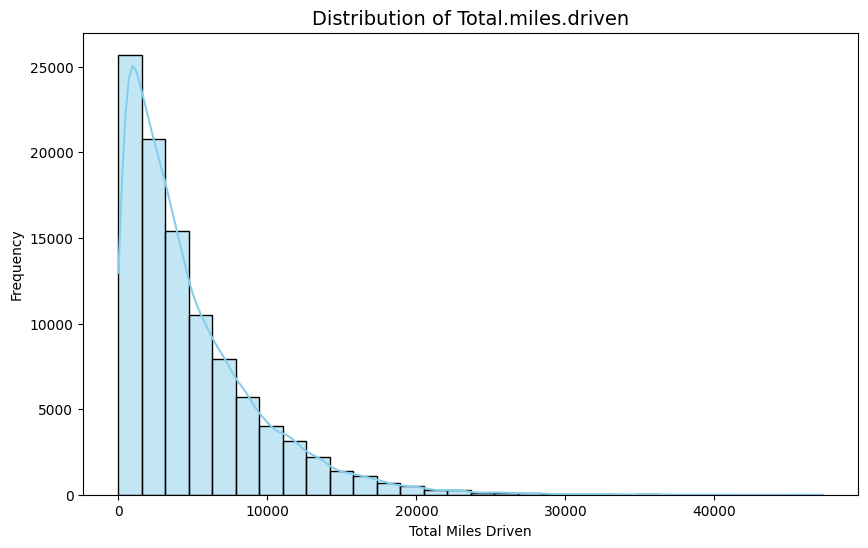

In [71]:
# Visualizing the distribution of Total.miles.driven
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1['Total.miles.driven'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total.miles.driven', fontsize=14)
plt.xlabel('Total Miles Driven')
plt.ylabel('Frequency')
plt.show()

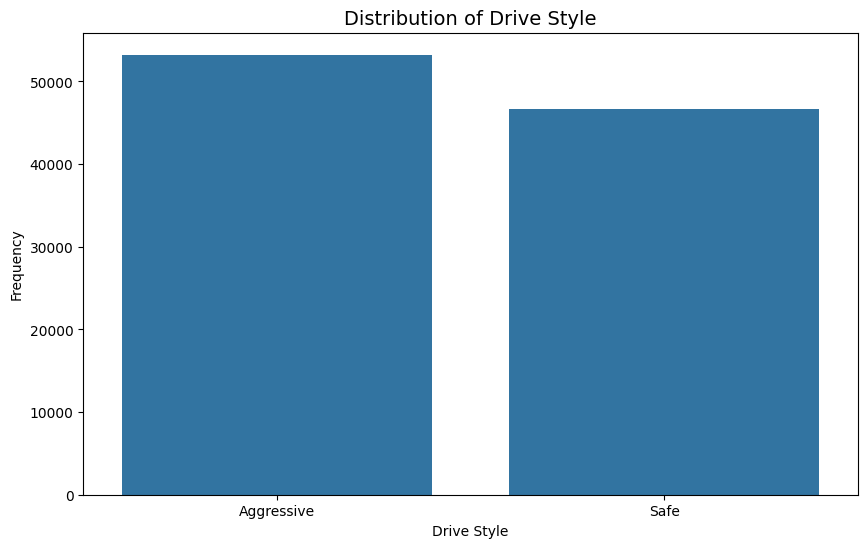

In [73]:
# For a categorical variable example, visualize Drive_Style distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Drive_Style', data=merged_df1)
plt.title('Distribution of Drive Style', fontsize=14)
plt.xlabel('Drive Style')
plt.ylabel('Frequency')
plt.show()


#### Multivariate Analysis
Multivariate analysis examines the relationships between multiple variables simultaneously. This can include correlation analysis and more complex modeling to understand how variables relate to each other.  

* Correlation Analysis: By calculating the correlation matrix, we can identify linear relationships between numeric variables. This helps in understanding which variables move together.  
* Visualization: Scatter plots, pair plots, and heatmaps of the correlation matrix are useful for visualizing relationships and patterns between variables.  

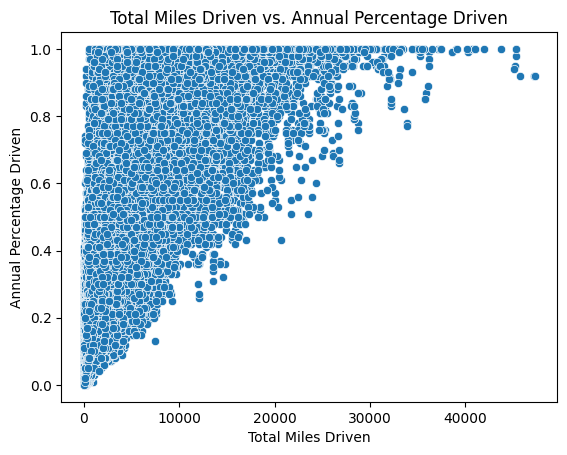

In [74]:
sns.scatterplot(x='Total.miles.driven', y='Annual.pct.driven', data=merged_df1)
plt.title('Total Miles Driven vs. Annual Percentage Driven')
plt.xlabel('Total Miles Driven')
plt.ylabel('Annual Percentage Driven')
plt.show()


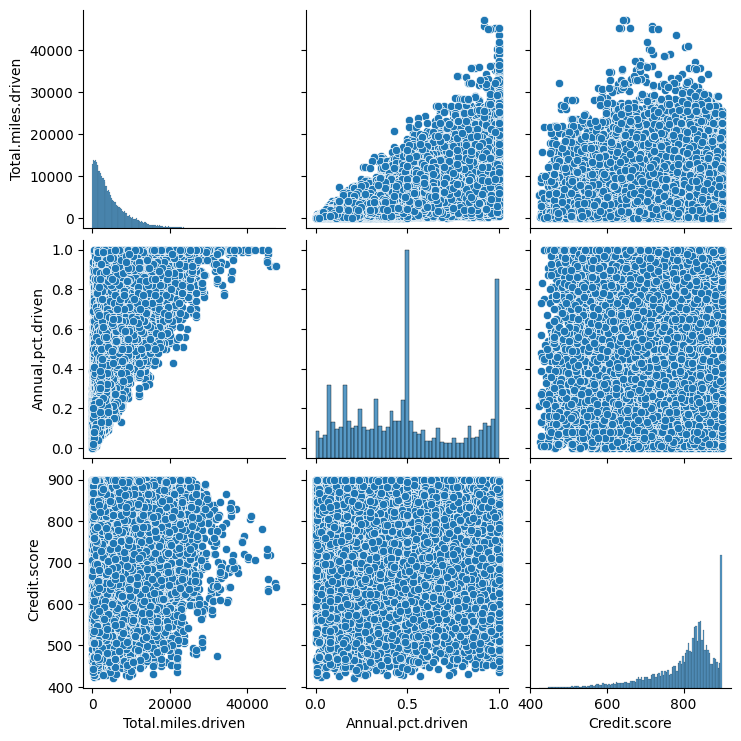

In [75]:
sns.pairplot(merged_df1[['Total.miles.driven', 'Annual.pct.driven', 'Credit.score']])


HeatMap : Correlation Matrix

In [79]:
# Correcting the approach to exclude 'Id_pol' properly
# First, ensure 'Id_pol' is not considered in numeric calculations

# Exclude 'Id_pol' directly when selecting columns for correlation
numeric_cols = merged_df1.columns.drop('Id_pol')  # Drop 'Id_pol' from the list of columns
numeric_df_corrected = merged_df1[numeric_cols].select_dtypes(include=[np.number])

# Calculate the correlation matrix again
correlation_matrix_corrected = numeric_df_corrected.corr()

correlation_matrix_corrected.head()  # Display the first few rows of the corrected correlation matrix


,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,Pct.drive.wed,Pct.drive.thr,Pct.drive.fri,Pct.drive.sat,Pct.drive.sun,Pct.drive.wkday,...,Annual.miles.drive,Years.noclaims,Territory,Light_Accel_sum,Intense_Accel_sum,Light_Brake_sum,Intense_Brake_sum,Light_turn_sum,Intense_turn_sum,Sudden_turns
Annual.pct.driven,1.000000,0.704513,-0.031156,-0.078881,0.029475,0.018725,0.009534,0.028527,0.021092,-0.030158,...,0.022279,-0.104705,0.025936,-0.053663,-0.018530,-0.065520,-0.018154,0.007017,0.002739,0.005505
Total.miles.driven,0.704513,1.000000,-0.018176,-0.076615,-0.000269,0.003164,0.006923,0.038360,0.039591,-0.047904,...,0.299524,-0.200987,0.033339,-0.116716,-0.024815,-0.131302,-0.025174,0.005773,0.005270,0.005662
Pct.drive.mon,-0.031156,-0.018176,1.000000,0.038050,-0.104979,-0.156382,-0.198315,-0.281932,-0.183790,0.291088,...,0.006950,0.012464,0.000714,0.038532,0.010057,0.017594,0.009081,-0.000905,-0.002027,-0.001339
Pct.drive.tue,-0.078881,-0.076615,0.038050,1.000000,0.030762,-0.068984,-0.207150,-0.387007,-0.356563,0.462029,...,-0.018841,0.088866,0.008315,0.020942,0.009451,0.028813,0.004134,-0.002979,-0.002884,-0.002984
Pct.drive.wed,0.029475,-0.000269,-0.104979,0.030762,1.000000,0.071592,-0.144869,-0.377874,-0.364651,0.461211,...,-0.007683,0.084464,0.005421,-0.005507,0.000534,-0.003859,-0.000469,-0.012422,-0.011862,-0.012379


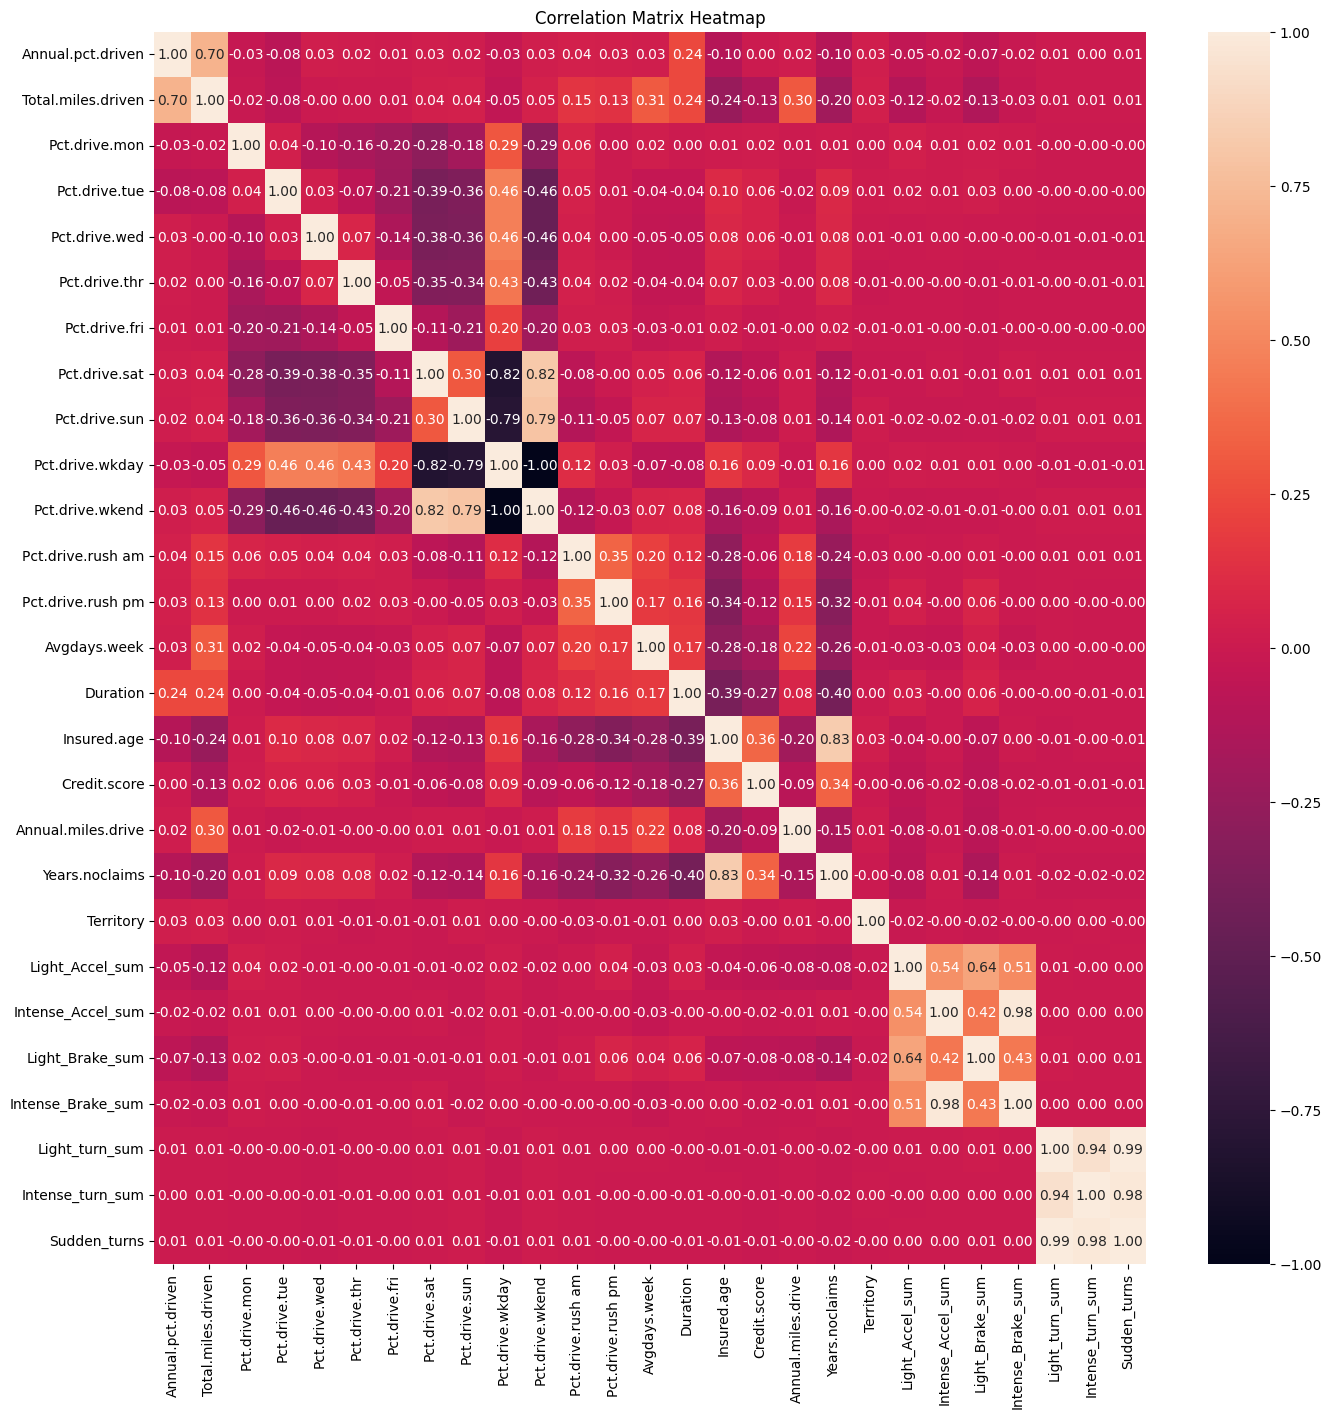

In [83]:
# Drop the 'Id_pol' column before calculating the correlation matrix
df_numeric = merged_df1.drop(columns=['Id_pol']).select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns excluding 'Id_pol'
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


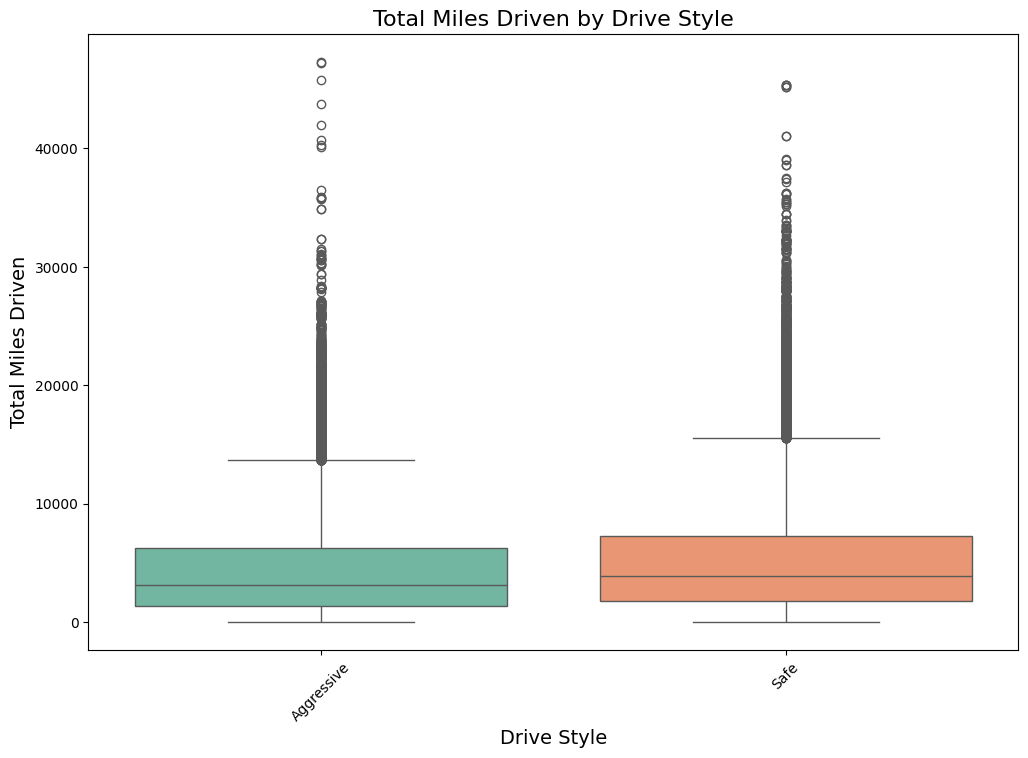

In [85]:
# Creating a box plot for Total.miles.driven across different Drive_Style categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Drive_Style', y='Total.miles.driven', data=merged_df1, palette='Set2')
plt.title('Total Miles Driven by Drive Style', fontsize=16)
plt.xlabel('Drive Style', fontsize=14)
plt.ylabel('Total Miles Driven', fontsize=14)
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.show()


## 5. Modélisation
### 5.1 supervisée (régression, classification) vs non supervisée   